In [30]:
import pandas as pd
import numpy as np

In [31]:
data = pd.read_csv('fer2013.csv')
dataval = data.values

In [53]:
mood = (data['emotion'].values)
faces = (data['pixels'].values)
dim = len(faces[2])

In [54]:
faces = np.array([c.split() for c in faces], dtype=int)

In [55]:
mean = np.mean(faces,axis=0)
std = np.std(faces,axis=0)
faces = (faces-mean)/std

In [32]:
import pickle
with open("mean.pkl", mode="wb") as f:
    pickle.dump(mean,f)
with open("std.pkl", mode="wb") as f:
    pickle.dump(mean,f)

In [77]:
faces = faces.reshape(faces.shape[0],48,48)
N = len(faces)
print(N)
x_train = faces[:N//4*3]
y_train = mood

35887


In [78]:
import liveplot
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


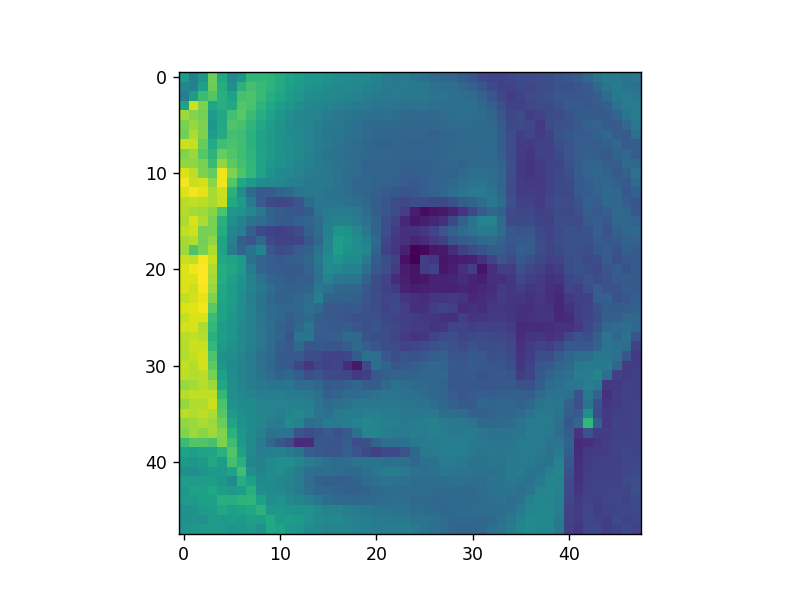

6


In [79]:
fig,ax = plt.subplots()
i=75
ax.imshow(faces[i]) 
print(mood[i])

In [80]:
x_train = faces[:N//4*3]
y_train = mood[:N//4*3]
x_test = faces[N//4*3:]
y_test = mood[N//4*3:]

In [81]:
import mygrad as mg
from mygrad import Tensor

In [82]:
def accuracy(predictions, truth):
    """
    Returns the mean classification accuracy for a batch of predictions.
    
    Parameters
    ----------
    predictions : Union[numpy.ndarray, mg.Tensor], shape=(M, D)
        The scores for D classes, for a batch of M data points
    truth : numpy.ndarray, shape=(M,)
        The true labels for each datum in the batch: each label is an
        integer in [0, D)
    
    Returns
    -------
    float
    """
    if isinstance(predictions, mg.Tensor):
        predictions = predictions.data
    return np.mean(np.argmax(predictions, axis=1) == truth)

In [83]:
from mynn.layers.conv import conv
from mynn.layers.dense import dense
from mynn.layers.dropout import dropout
from mynn.activations.relu import relu
from mynn.initializers.glorot_normal import glorot_normal
from mygrad.nnet.layers import max_pool
from mynn.losses.cross_entropy import softmax_cross_entropy
import pickle

In [24]:
class Model:
    ''' A simple convolutional neural network. '''

    def __init__(self, dim_in=48, num_out=7, load=False):
        self.conv1 = conv(1, 32, 2, 2, stride=1, padding=0)
        self.conv2 = conv(32, 64, 3, 3, stride=2, padding=1)
        self.conv3 = conv(64, 128, 2, 2, stride=2)
        self.conv4 = conv(128, 256, 3, 3, stride=3)
        self.dense1 = dense(256, 512)
        self.dense2 = dense(512, num_out)
        if (load):
            with open("modelParam.pkl", "rb") as f:
                param = pickle.load(f)
                #print(param)
                self.conv1.weight = param[0]
                self.conv1.bias = param[1]
                self.conv2.weight = param[2]
                self.conv2.bias = param[3]
                self.conv3.weight = param[4]
                self.conv3.bias = param[5]
                self.conv4.weight = param[6]
                self.conv4.bias = param[7]
                self.dense1.weight = param[8]
                self.dense1.bias = param[9]
                self.dense2.weight = param[10]
                self.dense2.bias = param[11]

    def __call__(self, x):
        x = relu(self.conv1(x))
        x = max_pool(relu(self.conv2(x)), (2, 2), (2, 2))
        x = relu(self.conv3(x))
        x = max_pool(relu(self.conv4(x)), (2, 2), (2, 2))
        x = x.reshape(x.shape[0], 256)
        x = relu(self.dense1(x))
        x = self.dense2(x)
        return x

    @property
    def parameters(self, load=False):
        ''' A convenience function for getting all the parameters of our model. '''
        # This function should return a tuple of all of the trainable parameters of
        # your model. Recall that MyNN nicely gives you access to each layer's parameters:
        # `layer.paramters` will return a tuple of the parameters for a given layer.
        # E.g. `dense_layer.parameters` -> (w, b)

        # STUDENT CODE

        params = []
        for layer in (self.conv1, self.conv2, self.conv3, self.conv4, self.dense1, self.dense2):
            params += list(layer.parameters)
        return params


In [50]:
print (model.conv1.weight)

Tensor([[[[-0.19478721, -0.06064692],
          [ 0.11456826,  0.09688967]]],
 
 
        [[[-0.29971998,  0.03810936],
          [ 0.0784435 , -0.17624202]]],
 
 
        [[[-0.15421133, -0.07016148],
          [-0.00961808, -0.19859971]]],
 
 
        [[[-0.00107223,  0.08139284],
          [ 0.06118785,  0.03255834]]],
 
 
        [[[ 0.12045678,  0.00228784],
          [ 0.06760362, -0.18572061]]],
 
 
        [[[ 0.02568634,  0.02229255],
          [ 0.03609922,  0.02623267]]],
 
 
        [[[-0.1390592 , -0.17422325],
          [-0.20559321, -0.04198336]]],
 
 
        [[[ 0.1361229 ,  0.23899536],
          [-0.09793969, -0.08976665]]],
 
 
        [[[-0.29497526,  0.01290813],
          [ 0.05996311,  0.23138929]]],
 
 
        [[[ 0.11696343, -0.09865679],
          [ 0.09857931, -0.1372885 ]]],
 
 
        [[[ 0.0274133 , -0.04124006],
          [ 0.14631775,  0.13691104]]],
 
 
        [[[ 0.03333667, -0.10156244],
          [-0.04654551,  0.06926853]]],
 
 
        [[[ 0.18

In [215]:
# STUDENT CODE
from mynn.optimizers.adam import Adam
model = Model(load = True)
optim = Adam(model.parameters)

In [ ]:
modelNumpy = [c.data for c in model.parameters]
np.savez("npmodelParam.npz", l1w=modelNumpy[0],l1b=modelNumpy[1],l2w=modelNumpy[2],l2b=modelNumpy[3],l3w=modelNumpy[4],l3b=modelNumpy[5],l4w=modelNumpy[6],l4b=modelNumpy[7],l5w=modelNumpy[8],l5b=modelNumpy[9],l6w=modelNumpy[10],l6b=modelNumpy[11])

In [216]:
import liveplot
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


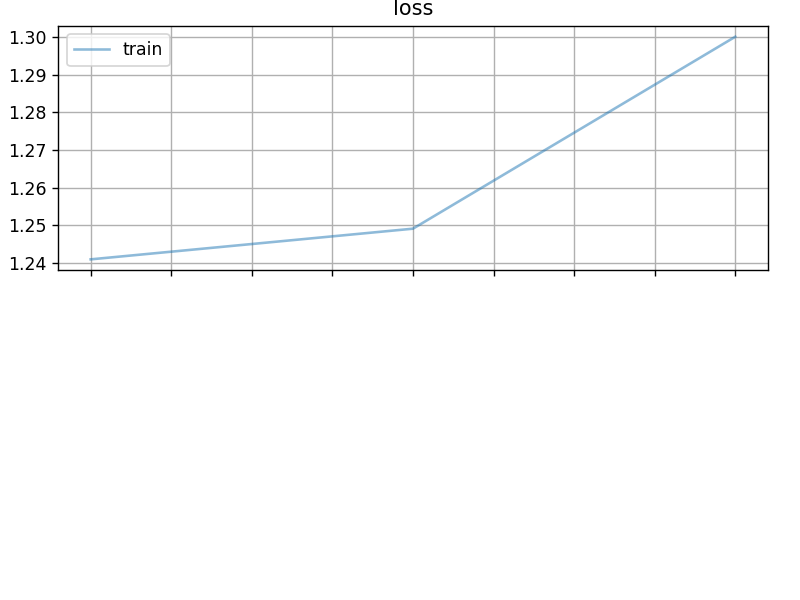

In [217]:
# STUDENT CODE
plotter, fig, ax = liveplot.create_plot(["loss","accuracy"], refresh=2.5)

In [218]:
batch_size = 100

# We will train for ~10 epochs; you can change this if you'd like
for epoch_cnt in range(10):
    idxs = np.arange(len(x_train))  # -> array([0, 1, ..., 9999])
    np.random.shuffle(idxs)  
        
    for batch_cnt in range(len(x_train)//batch_size):#len(x_train)//batch_size):
        batch_indices = idxs[batch_cnt*batch_size : (batch_cnt + 1)*batch_size]
        batch = x_train[batch_indices]  # random batch of our training data
        batch = batch.reshape((batch.shape[0],1,batch.shape[-2],batch.shape[-1]))
        # compute the predictions for this batch by calling on model
        #print (np.shape(batch))
        prediction = model(batch)
        # compute the true (a.k.a desired) values for this batch: 
        truth = y_train[batch_indices]
        # compute the loss associated w
        #with our predictions(use softmax_cross_entropy)
        loss = softmax_cross_entropy(prediction, truth)
        #print ((prediction))
        # back-propagate through your computational graph through your loss
        loss.backward()

        # compute the accuracy between the prediction and the truth 
        acc = accuracy(prediction, truth)
        optim.step()

        loss.null_gradients()
        # set the training loss and accuracy
        plotter.set_train_batch({"loss" : loss.item(),
                                 "accuracy" : acc},
                                batch_size=batch_size)

    # this tells liveplot to plot the epoch-level train/test statistics :)
    plotter.plot_train_epoch()
    plotter.plot_test_epoch()    

KeyboardInterrupt: 

In [219]:
idxs = np.arange(len(x_test))  # -> array([0, 1, ..., 9999])
np.random.shuffle(idxs)  
for batch_cnt in range(len(x_test)//batch_size):
    batch_indices = idxs[batch_cnt*batch_size:(batch_cnt+1)*batch_size]
    batch = x_test[batch_indices]
    batch = batch.reshape((batch.shape[0],1,batch.shape[-2],batch.shape[-1]))
    prediction = model(batch)
    truth = y_test[batch_indices]
    acc = accuracy(prediction, truth)
    print(acc)
    plotter.set_test_batch({"acc":acc}, batch_size=batch_size)

437

0.46


c:\users\jhan6\liveplot\liveplot\plotter.py:350: UserWarning: acc
  warnings.warn(cleandoc(msg.join(sorted(unreg_metrics))),)


360

0.43
663

0.46
145

0.47
234

0.52
500

0.46
94

0.47


KeyboardInterrupt: 

In [27]:
from camera import take_picture

In [87]:
# run this cell to download the models from dlib
from dlib_models import download_model, download_predictor, load_dlib_models
download_model()
download_predictor()
from dlib_models import models

File already exists:
	c:\users\jhan6\dlibmodels\dlib_models\dlib_face_recognition_resnet_model_v1.dat
File already exists:
	c:\users\jhan6\dlibmodels\dlib_models\shape_predictor_68_face_landmarks.dat


<IPython.core.display.Javascript object>


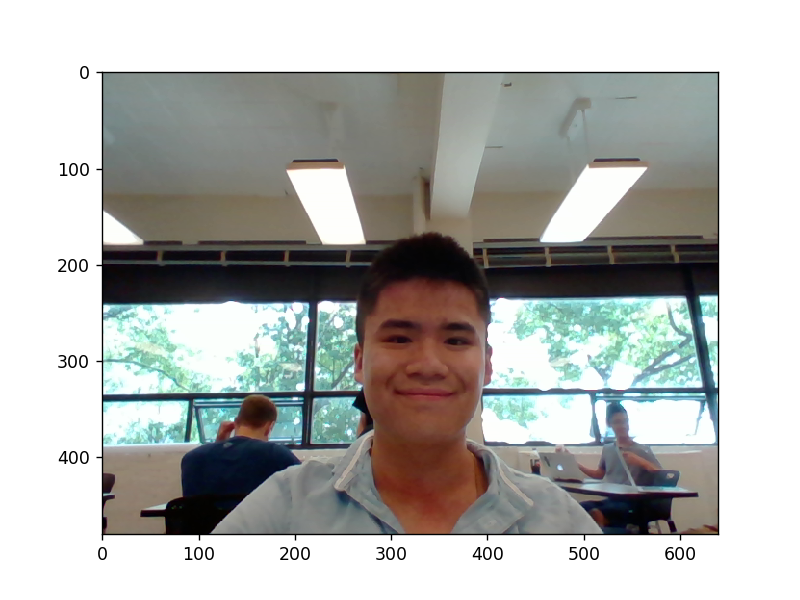

In [233]:
fig,ax = plt.subplots()
pic = take_picture()
ax.imshow(pic)

In [234]:
# first, we load the models that dlib has to detect faces.
load_dlib_models()
face_detect = models["face detect"]
face_rec_model = models["face rec"]
shape_predictor = models["shape predict"]

In [235]:
detections = list(face_detect(pic))
#print (face_detect(pic))
print(detections)

[rectangle(272,245,397,369)]


<IPython.core.display.Javascript object>


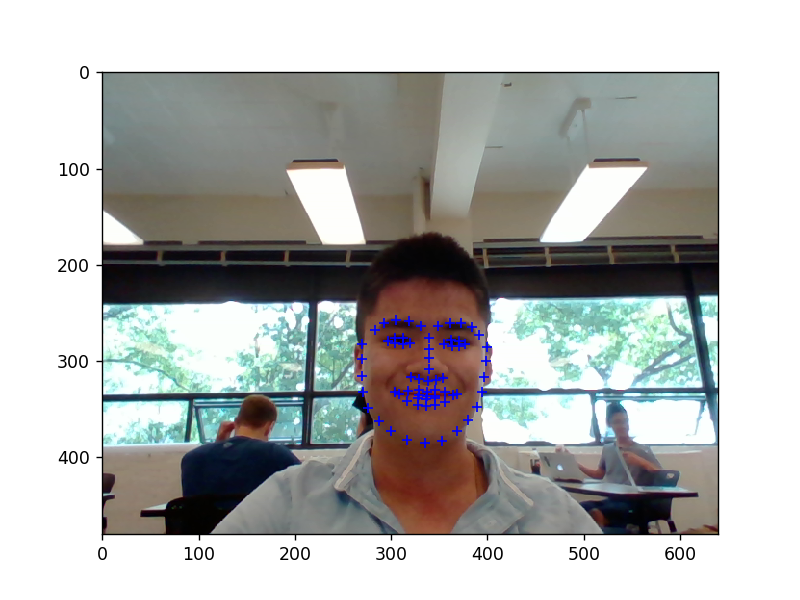

Number of faces detected: 1


In [236]:
from matplotlib.patches import Rectangle
fig,ax = plt.subplots()
ax.imshow(pic)


print("Number of faces detected: {}".format(len(detections)))
for k, d in enumerate(detections):
    # Get the landmarks/parts for the face in box d.
    shape = shape_predictor(pic, d)
    # Draw the face landmarks on the screen.""
    for i in range(68):
        ax.plot(shape.part(i).x,shape.part(i).y,'+',color="blue")

<IPython.core.display.Javascript object>


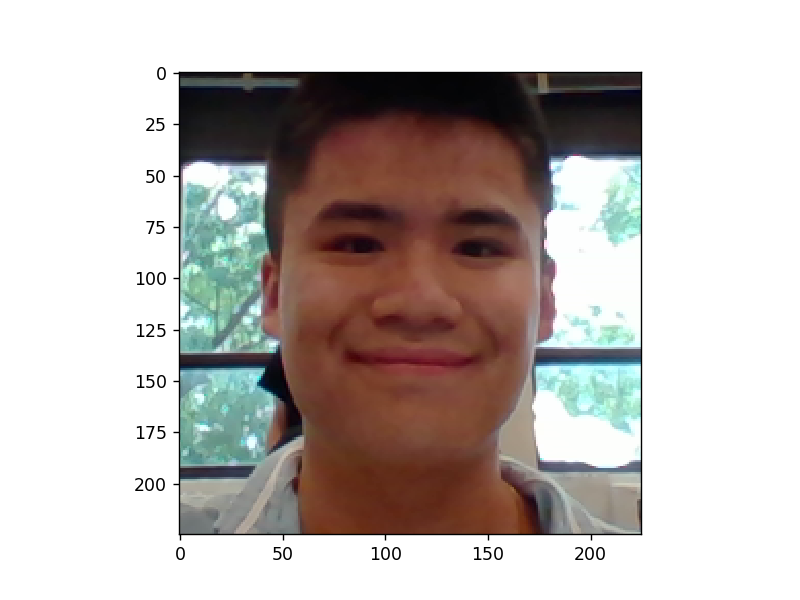

125


In [237]:
detect = list(detections)
for i in detect:
    fig,ax = plt.subplots()
    width = np.abs(i.left() - i.right())
    bottom = i.bottom() + 50
    top = i.top() -50 # height = top - bottom # top += height*0.3
    left = i.left()
    right = i.right()
    print (width)
    top = bottom-width -100
    if top <= 0:
        top = 0
    faceArray = (pic[top:bottom,left-50:left + width+50]) 
    ax.imshow(pic[top:bottom,left-50:left + width+50]) 

In [238]:
x,y,z=faceArray.shape ## where z is the RGB dimension
### Method block begin
blackWhite = np.copy(faceArray)
blackWhite[:] = faceArray.mean(axis=-1,keepdims=1) 
blackWhite = (blackWhite[:,:,0])

In [239]:
def filterer(array):
    input_width = np.shape(array)[0]
    input_length = np.shape(array)[1]
    print (np.shape(array))
    filt_width = input_width // 48
    filt_length = input_length//48
    filtered = np.zeros((48,48))
    for rows in range (48):
        for col in range (48):
            num = np.mean(array[rows*filt_width:(rows+1)*filt_width,col*filt_length:(col+1)*filt_width])
            filtered[rows,col] = num
    return filtered

In [240]:
filtered_black_white = filterer(blackWhite)

(225, 225)


In [241]:
print (np.shape(filtered_black_white))

(48, 48)


<IPython.core.display.Javascript object>


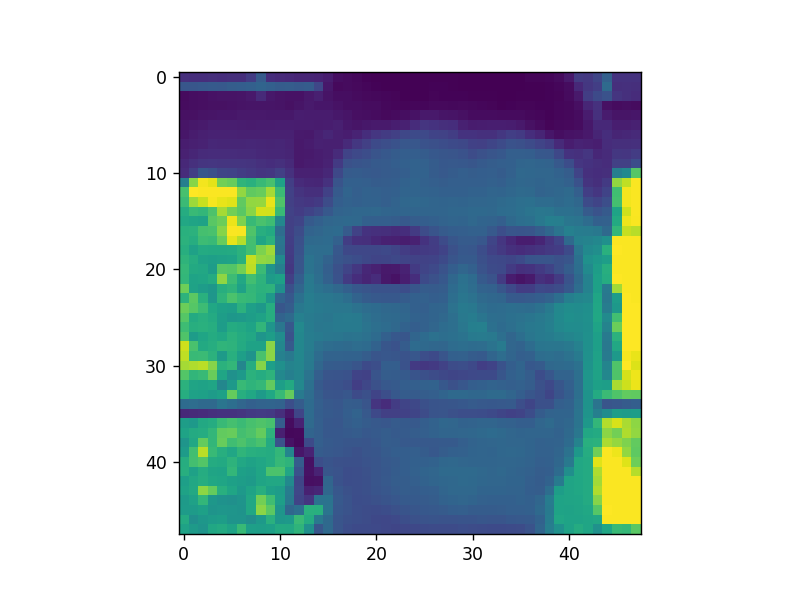

In [242]:
fig,ax = plt.subplots()
ax.imshow(filtered_black_white)

In [243]:
filtered_black_white = (filtered_black_white.flatten() - mean)/std
#normalize data

In [244]:
print (np.shape(filtered_black_white))

(2304,)


In [245]:
filtered_black_white = np.reshape(filtered_black_white,(1,1,48,48))
print (np.shape(filtered_black_white))
output = model(filtered_black_white)
print (output)
firstPic = np.argmax(output)
print (np.argmax(output))
dictionary = {0: "Angry", 1:"Disgust", 2 : "Fear", 3 : "Happy", 4:"Sad",5:"Surprise",6:"Neutral"}
print (dictionary[np.argmax(output)])
#gives the face
#:0 = angry, 1 = Digust, 2 = Fear, 3 = Happy, 4 = Sad, 5 = Surprise, 6 = Neutral

(1, 1, 48, 48)
Tensor([[-0.81750256, -4.08150459, -0.6428677 ,  1.02551098,  0.35490626,
         -1.18115976,  1.7167271 ]])
6
Neutral
